In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
mesh=pd.read_csv("data/mesh.csv")
mesh.head(2)

,term,tree
0,Calcimycin,D03.633.100.221.173
1,A-23187,D03.633.100.221.173


In [3]:
pharma=pd.read_csv("data/pharma.csv")
pharma.head(2)

,Company,Parent_Company,Penalty_Amount,Subtraction_From_Penalty,Penalty_Amount_Adjusted_For_Eliminating_Multiple_Counting,Penalty_Year,Penalty_Date,Offense_Group,Primary_Offense,Secondary_Offense,...,NAICS_Code,NAICS_Translation,HQ_Country_of_Parent,HQ_State_of_Parent,Ownership_Structure,Parent_Company_Stock_Ticker,Major_Industry_of_Parent,Specific_Industry_of_Parent,Info_Source,Notes
0,Abbott Laboratories,Abbott Laboratories,"$5,475,000",$0,"$5,475,000",2013,20131227,government-contracting-related offenses,False Claims Act and related,kickbacks and bribery,...,NaN,NaN,USA,Illinois,publicly traded,ABT,pharmaceuticals,pharmaceuticals,https://www.justice.gov/opa/pr/abbott-laborato...,NaN
1,Abbott Laboratories Inc.,AbbVie,"$1,500,000,000",$0,"$1,500,000,000",2012,20120507,healthcare-related offenses,off-label or unapproved promotion of medical p...,NaN,...,NaN,NaN,USA,Illinois,publicly traded,ABBV,pharmaceuticals,pharmaceuticals,http://www.justice.gov/opa/pr/abbott-labs-pay-...,NaN


In [4]:
clinical=pd.read_csv("data/clinicaltrial_2021.csv", delimiter='|')

In [5]:
clinical.head(2)

,Id,Sponsor,Status,Start,Completion,Type,Submission,Conditions,Interventions
0,NCT02758028,The University of Hong Kong,Recruiting,Aug 2005,Nov 2021,Interventional,Apr 2016,NaN,NaN
1,NCT02751957,Duke University,Completed,Jul 2016,Jul 2020,Interventional,Apr 2016,"Autistic Disorder,Autism Spectrum Disorder",NaN


### 1. The number of studies in the dataset. You must ensure that you explicitly check distinct studies. 

In [6]:
clinical["Id"].nunique()

387261

In [7]:
clinical.columns

Index(['Id', 'Sponsor', 'Status', 'Start', 'Completion', 'Type', 'Submission',
       'Conditions', 'Interventions'],
      dtype='object')

In [8]:
clinical["Type"].nunique()

4

In [9]:
clinical["Type"].unique()

array(['Interventional', 'Observational',
       'Observational [Patient Registry]', 'Expanded Access'],
      dtype=object)

### 2. You should list all the types (as contained in the Type column) of studies in the dataset along with the frequencies of each type. These should be ordered from most frequent to least frequent.

In [10]:
clinical["Type"].value_counts()

Type
Interventional                      301472
Observational                        77540
Observational [Patient Registry]      8180
Expanded Access                         69
Name: count, dtype: int64

### 3.The top 5 conditions (from Conditions) with their frequencies

In [11]:
clinical["Conditions"].value_counts().head(5)

Conditions
Diabetes Mellitus      7460
Breast Neoplasms       6054
Carcinoma              3788
Prostatic Neoplasms    3700
COVID-19               3118
Name: count, dtype: int64

### 4. Each condition can be mapped to one or more hierarchy codes. The client wishes to know the 5 most frequent roots (i.e. the sequence of letters and numbers before the first full stop) after this is done.

In [12]:
mesh.head(2)

,term,tree
0,Calcimycin,D03.633.100.221.173
1,A-23187,D03.633.100.221.173


In [13]:
clinical

,Id,Sponsor,Status,Start,Completion,Type,Submission,Conditions,Interventions
0,NCT02758028,The University of Hong Kong,Recruiting,Aug 2005,Nov 2021,Interventional,Apr 2016,NaN,NaN
1,NCT02751957,Duke University,Completed,Jul 2016,Jul 2020,Interventional,Apr 2016,"Autistic Disorder,Autism Spectrum Disorder",NaN
2,NCT02758483,Universidade Federal do Rio de Janeiro,Completed,Mar 2017,Jan 2018,Interventional,Apr 2016,Diabetes Mellitus,NaN
3,NCT02759848,Istanbul Medeniyet University,Completed,Jan 2012,Dec 2014,Observational,May 2016,"Tuberculosis,Lung Diseases,Pulmonary Disease",NaN
4,NCT02758860,University of Roma La Sapienza,"Active, not recruiting",Jun 2016,Sep 2020,Observational [Patient Registry],Apr 2016,"Diverticular Diseases,Diverticulum,Diverticulosis",NaN
...,...,...,...,...,...,...,...,...,...
387256,NCT04576611,University of the Balearic Islands,Completed,Mar 2019,Feb 2020,Interventional,Jul 2020,"Back Pain,Low Back Pain",NaN
387257,NCT04571138,Seattle Children's Hospital,Recruiting,Sep 2020,Feb 2038,Interventional,Sep 2020,"Lymphoma,Leukemia",NaN
387258,NCT04578847,"National Research Center for Hematology, Russia","Active, not recruiting",Jan 2020,Jan 2025,Interventional,Mar 2020,Leukemia,"Imatinib Mesylate,Dasatinib"
387259,NCT04577300,Stanford University,Recruiting,May 2021,Dec 2023,Interventional,Sep 2020,Glaucoma,NaN


In [14]:
merged=pd.merge(clinical,mesh,left_on='Conditions',right_on='term',how='left')
merged.head()

,Id,Sponsor,Status,Start,Completion,Type,Submission,Conditions,Interventions,term,tree
0,NCT02758028,The University of Hong Kong,Recruiting,Aug 2005,Nov 2021,Interventional,Apr 2016,NaN,NaN,NaN,NaN
1,NCT02751957,Duke University,Completed,Jul 2016,Jul 2020,Interventional,Apr 2016,"Autistic Disorder,Autism Spectrum Disorder",NaN,NaN,NaN
2,NCT02758483,Universidade Federal do Rio de Janeiro,Completed,Mar 2017,Jan 2018,Interventional,Apr 2016,Diabetes Mellitus,NaN,Diabetes Mellitus,C18.452.394.750
3,NCT02758483,Universidade Federal do Rio de Janeiro,Completed,Mar 2017,Jan 2018,Interventional,Apr 2016,Diabetes Mellitus,NaN,Diabetes Mellitus,C19.246
4,NCT02759848,Istanbul Medeniyet University,Completed,Jan 2012,Dec 2014,Observational,May 2016,"Tuberculosis,Lung Diseases,Pulmonary Disease",NaN,NaN,NaN


In [15]:
merged["code"]=merged["tree"].str.split(".").str[0]
merged

,Id,Sponsor,Status,Start,Completion,Type,Submission,Conditions,Interventions,term,tree,code
0,NCT02758028,The University of Hong Kong,Recruiting,Aug 2005,Nov 2021,Interventional,Apr 2016,NaN,NaN,NaN,NaN,NaN
1,NCT02751957,Duke University,Completed,Jul 2016,Jul 2020,Interventional,Apr 2016,"Autistic Disorder,Autism Spectrum Disorder",NaN,NaN,NaN,NaN
2,NCT02758483,Universidade Federal do Rio de Janeiro,Completed,Mar 2017,Jan 2018,Interventional,Apr 2016,Diabetes Mellitus,NaN,Diabetes Mellitus,C18.452.394.750,C18
3,NCT02758483,Universidade Federal do Rio de Janeiro,Completed,Mar 2017,Jan 2018,Interventional,Apr 2016,Diabetes Mellitus,NaN,Diabetes Mellitus,C19.246,C19
4,NCT02759848,Istanbul Medeniyet University,Completed,Jan 2012,Dec 2014,Observational,May 2016,"Tuberculosis,Lung Diseases,Pulmonary Disease",NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
588350,NCT04576611,University of the Balearic Islands,Completed,Mar 2019,Feb 2020,Interventional,Jul 2020,"Back Pain,Low Back Pain",NaN,NaN,NaN,NaN
588351,NCT04571138,Seattle Children's Hospital,Recruiting,Sep 2020,Feb 2038,Interventional,Sep 2020,"Lymphoma,Leukemia",NaN,NaN,NaN,NaN
588352,NCT04578847,"National Research Center for Hematology, Russia","Active, not recruiting",Jan 2020,Jan 2025,Interventional,Mar 2020,Leukemia,"Imatinib Mesylate,Dasatinib",Leukemia,C04.557.337,C04
588353,NCT04577300,Stanford University,Recruiting,May 2021,Dec 2023,Interventional,Sep 2020,Glaucoma,NaN,Glaucoma,C11.525.381,C11


In [16]:
freq=merged["code"].value_counts().head(5).reset_index()
freq.columns=["Code","freq"]
freq

,Code,freq
0,C04,49570
1,C01,34280
2,C06,31308
3,C23,28191
4,C08,26119


### 5. 10 most common sponsors that are not pharmaceutical companies along with the number of clinical trials they have sponsored

In [17]:
clinical["Sponsor"].value_counts()

Sponsor
GlaxoSmithKline                                     3378
National Cancer Institute (NCI)                     3218
AstraZeneca                                         2691
Pfizer                                              2645
M.D. Anderson Cancer Center                         2414
                                                    ... 
Franklyn Cladis                                        1
Children's Investigational Research Program, LLC       1
Korean Urological Oncology Society                     1
Nazrat Mirza                                           1
Cecilie Bartholdy                                      1
Name: count, Length: 34442, dtype: int64

In [18]:
val=pharma["Company"].unique().tolist()

In [19]:
x=clinical[~clinical["Sponsor"].isin(val)]
x["Sponsor"].value_counts().head(10)

Sponsor
National Cancer Institute (NCI)            3218
M.D. Anderson Cancer Center                2414
Assistance Publique - Hôpitaux de Paris    2369
Mayo Clinic                                2300
Assiut University                          2154
Massachusetts General Hospital             1971
Cairo University                           1928
Hoffmann-La Roche                          1828
National Taiwan University Hospital        1814
Memorial Sloan Kettering Cancer Center     1604
Name: count, dtype: int64

### 6.Ploting number of completed studies each month in a given year

In [20]:
x=clinical["Completion"].str.split(" ",expand=True)
x.columns=["month","year"]
x

,month,year
0,Nov,2021
1,Jul,2020
2,Jan,2018
3,Dec,2014
4,Sep,2020
...,...,...
387256,Feb,2020
387257,Feb,2038
387258,Jan,2025
387259,Dec,2023


In [21]:
xx=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct']
df1=clinical[(clinical["Status"]=='Completed') & (x['year'] == '2021')].groupby(x["month"]).count().loc[xx].reset_index()
df1[["month","Completion"]]

,month,Completion
0,Jan,1131
1,Feb,934
2,Mar,1227
3,Apr,967
4,May,984
5,Jun,1094
6,Jul,819
7,Aug,700
8,Sep,528
9,Oct,187


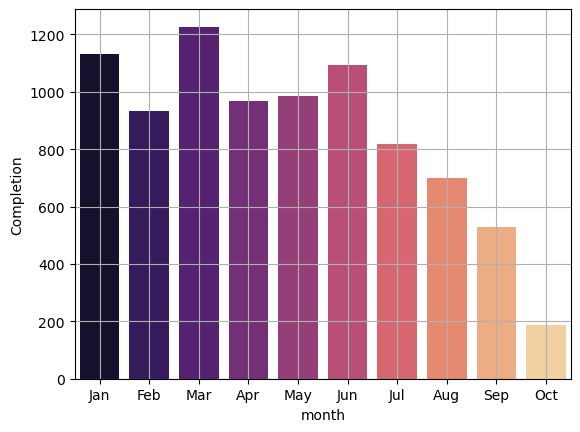

In [22]:

sns.barplot(x='month', y='Completion',data=df1,palette="magma")
plt.grid()